In [193]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import column_generation
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import Normalizer
from matplotlib import pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [186]:
df = pd.read_csv("datasets/wdbc.data", header=None)

In [187]:
df

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [188]:
X = df.values[:,2:]
y = (df[1]=='M').apply(lambda x: -1 if x else 1).values.astype(float)

In [189]:
X = Normalizer().fit_transform(X)

In [190]:
np.unique(y)

array([-1.,  1.])

In [243]:
lambda_star, F, soglie = column_generation.column_generation(X, y, C=1)

iteration 0----------------------------------------------------------------------------------------------------
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) Mar 25 06:34:49 PM: Your problem has 569 variables, 63 constraints, and 0 parameters.
(CVXPY) Mar 25 06:34:49 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Mar 25 06:34:49 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Mar 25 06:34:49 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Mar 25 06:34:49 PM: Compiling problem (tar

In [232]:
len(F)

30

In [237]:
omega_star = {}

for l in soglie.keys():
    soglie[l] = soglie[l].sort()
    omega_star[l] = np.zeros(len(soglie[l]))
    for b, phi in enumerate(soglie[l]):
        for i in range(len(X)):
            c = 1 if X[i,l] > phi else 0
            omega_star[l][b] += lambda_star[i] * c * X[i,l]


TypeError: object of type 'NoneType' has no len()

[0.11735623 0.20869655 0.04404084] [0.015061278825455734, 0.014322813074828378, 0.016731642239780686]


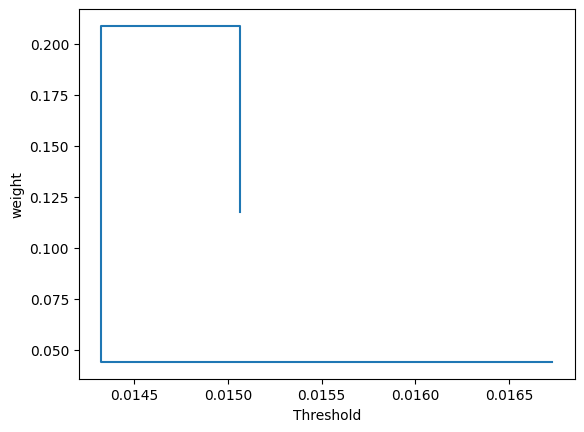

[0.40189044 0.47473058 0.12282968] [0.02035203707696362, 0.017923366819729537, 0.026755924672351484]


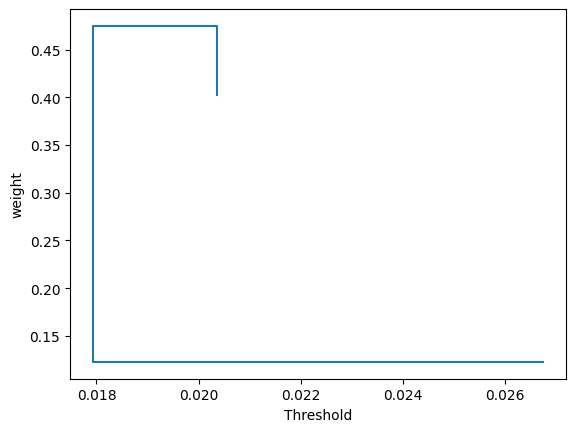

[0.85354274 0.90314633 0.32052732 1.96086085] [0.09715082124237309, 0.09686907634576881, 0.11037654296471898, 0.08915357155801584]


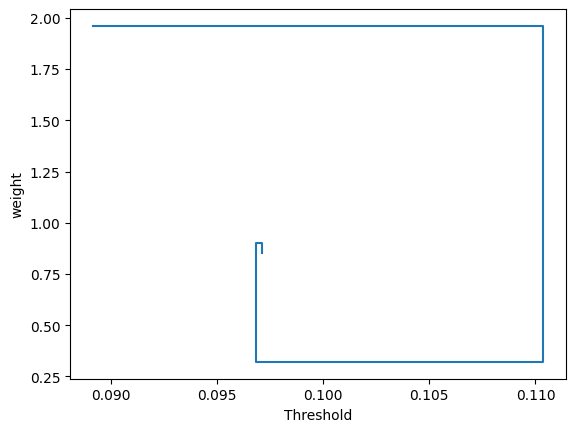

[10.54096589 19.49675679 12.11067615] [0.6152191536736598, 0.5819070388110308, 0.608339983749299]


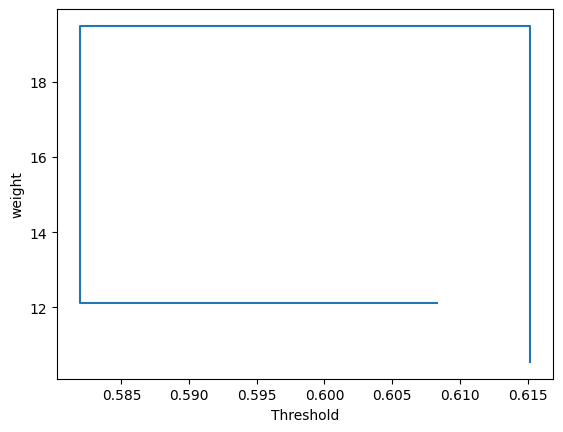

[0.00177755 0.00032828 0.00125122] [0.00010382548434629268, 0.00019115986803642553, 0.00010849738162519878]


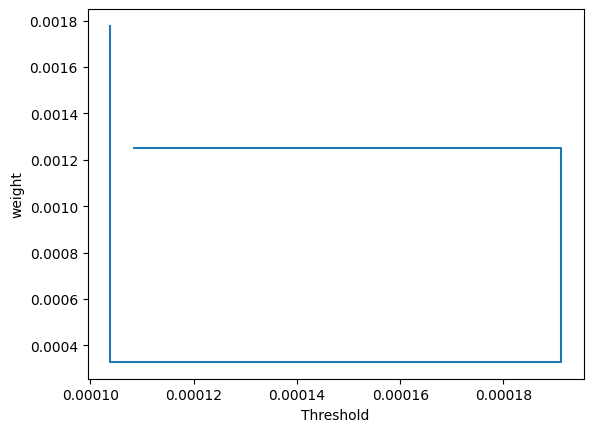

[0.00303533 0.00399847 0.00363836] [9.400124144489939e-05, 5.377000369526866e-05, 7.175719290769668e-05]


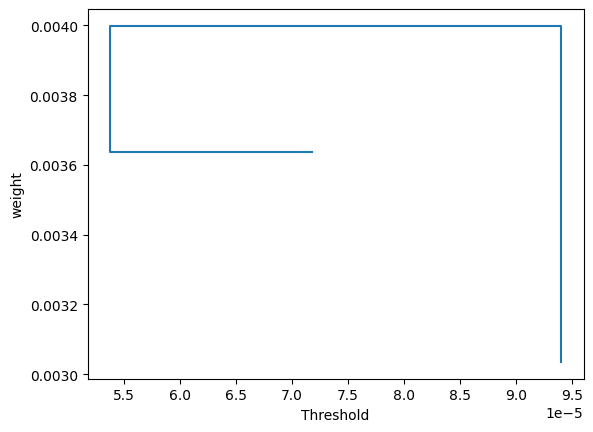

[0.00309367 0.00388127 0.00317051 0.00317051 0.00362327 0.00162199] [6.385504500725327e-05, 1.6256720656877108e-05, 5.910803928464997e-05, 5.972912027817303e-05, 3.82228160562617e-05, 0.00013460795916169304]


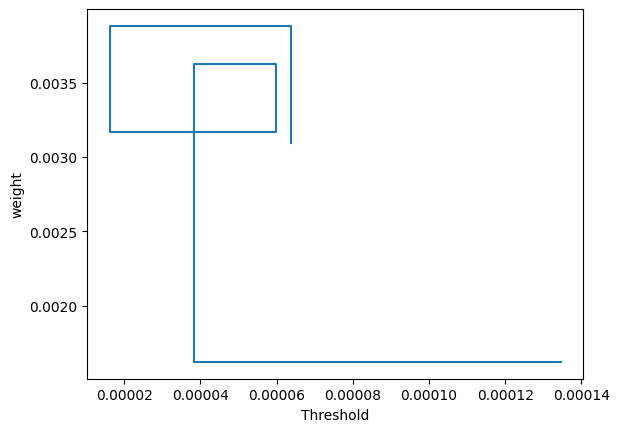

[0.00143937 0.00180312 0.00181273 0.00183539 0.0015371 ] [3.848156566475069e-05, 2.5125832622811214e-05, 2.2659016602977627e-05, 2.075120490245511e-05, 3.310496623722313e-05]


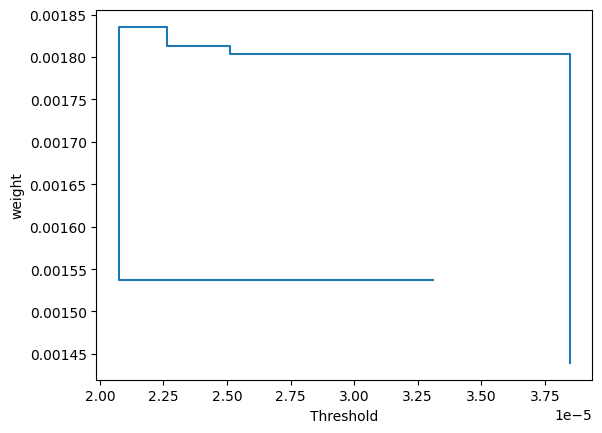

[0.00310103 0.00449413 0.00109592 0.00609395 0.00287087] [0.0001935251157761468, 0.0001752439843065024, 0.00025586950300891825, 0.00013871194922664194, 0.00019786714824393447]


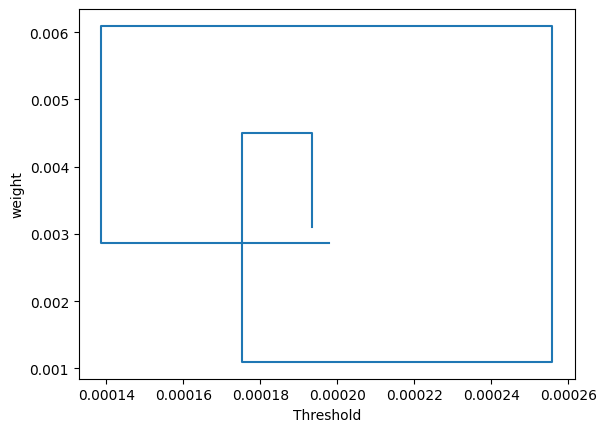

[0.00110943 0.0011526  0.00027121 0.00206978 0.00246573] [6.885551280820014e-05, 6.684468501763582e-05, 0.00012497705188236702, 5.0635150205722486e-05, 4.229952738421362e-05]


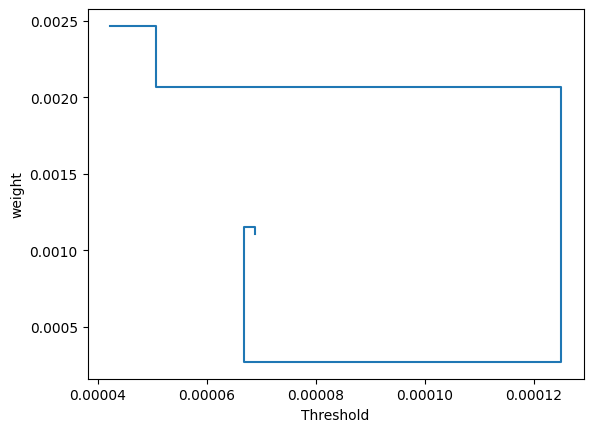

[0.00935557 0.01328016] [0.0003431004585810102, 0.00024128808811026505]


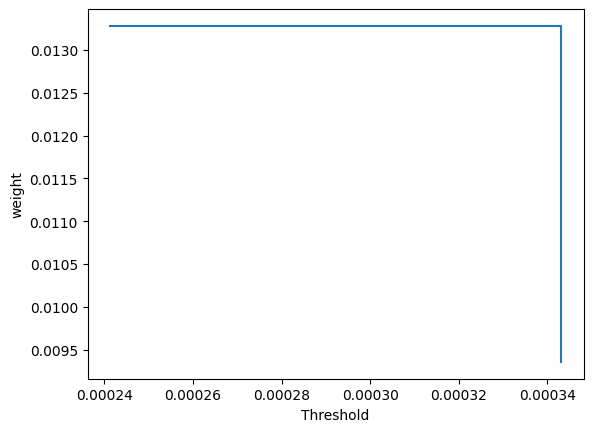

[0.03186838 0.04401294 0.01098489] [0.001129722453085095, 0.0007100294661438123, 0.0022325474897295586]


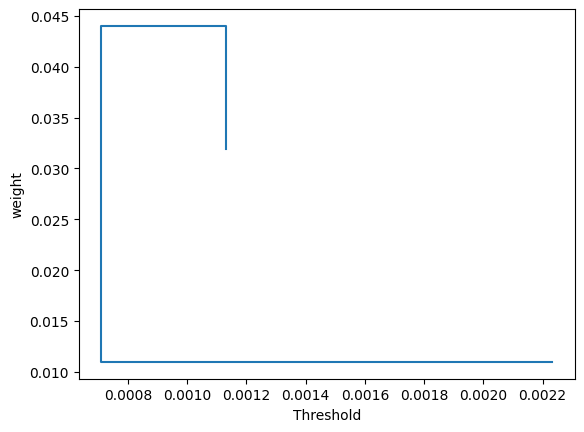

[0.07587056 0.10293557 0.07788685] [0.0024201895900099776, 0.0014315137925192307, 0.0023210351718301932]


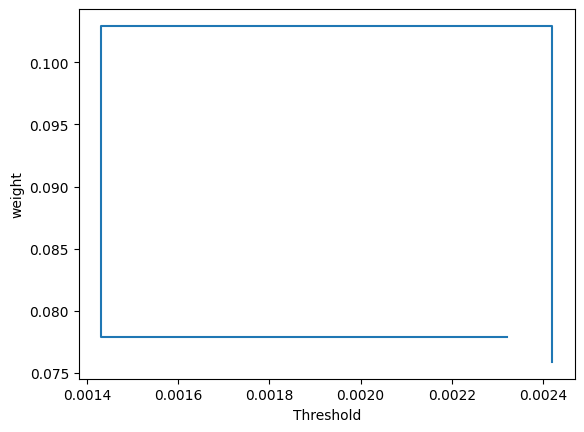

[0.79439815 0.36343926 0.75000817 0.51807532 0.76293102] [0.03016316620591424, 0.044730785820959545, 0.03200775298673105, 0.03608286194221852, 0.031208517289530488]


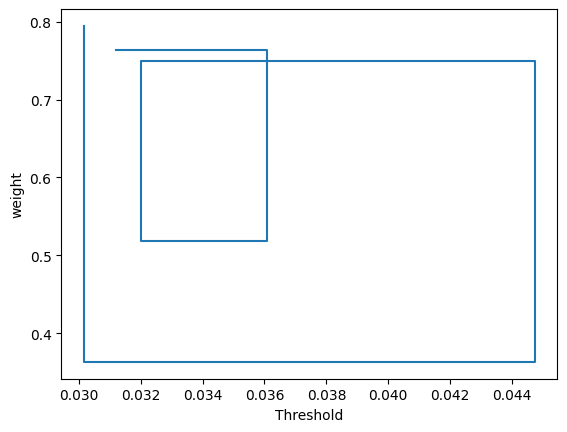

[1.60262038e-04 5.14545874e-05 2.25761847e-04 2.03712347e-04] [6.714754547302155e-06, 1.0629851166642601e-05, 4.217239639943199e-06, 5.103568997324322e-06]


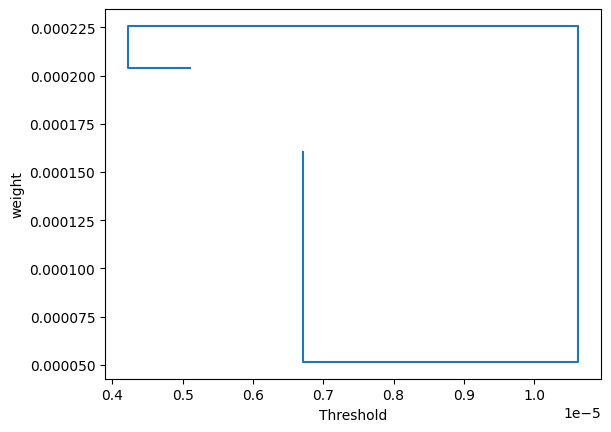

[0.00095083 0.00098026 0.00101529 0.00101429] [1.990805887666662e-05, 1.6061849119921566e-05, 1.4666746892583298e-05, 1.5272181230137043e-05]


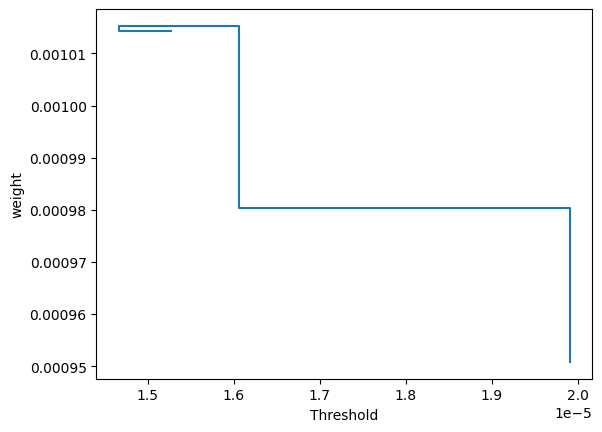

[0.00153057 0.0015696  0.00180044 0.0015844 ] [2.3068057804551835e-05, 2.153073043207769e-05, 7.835831824855118e-06, 1.812906768856066e-05]


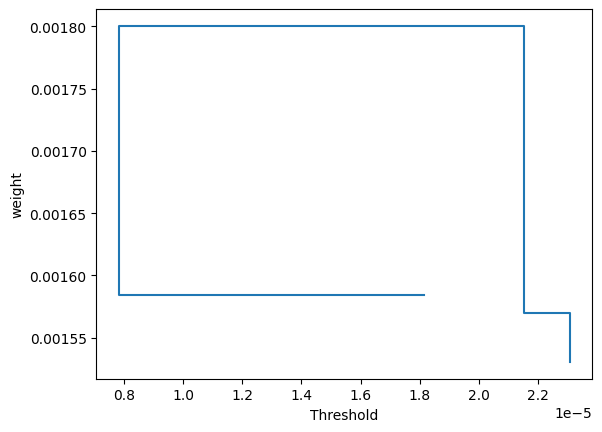

[0.00046155 0.00051043 0.00053901 0.00047625] [1.0401045022016667e-05, 7.648538661433514e-06, 5.934096159845739e-06, 9.230535100571791e-06]


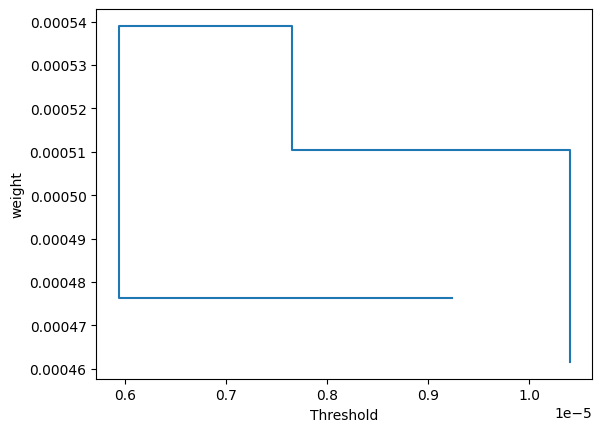

[0.00044943 0.00072172 0.00062598] [2.0344242108964787e-05, 1.104578942341036e-05, 1.4182625756890666e-05]


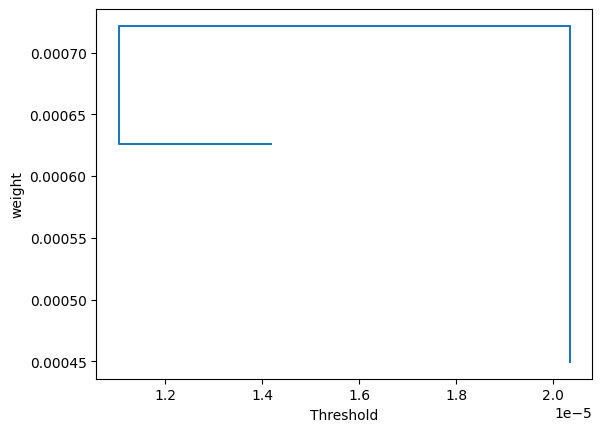

[1.41889185e-04 1.71728380e-04 6.61965333e-05 1.74578002e-04
 7.53275684e-05] [3.112070332515592e-06, 1.8316730026682098e-06, 1.1231429815304651e-05, 1.48796548416066e-06, 8.073514759370848e-06]


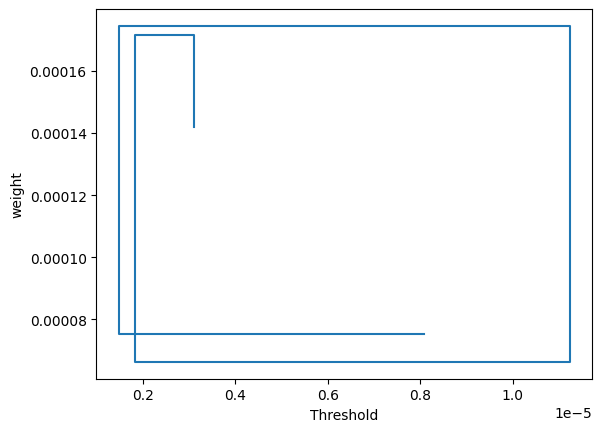

[0.16080463 0.60002514 0.14658051] [0.016722037936136875, 0.013711611505020434, 0.017015879775672756]


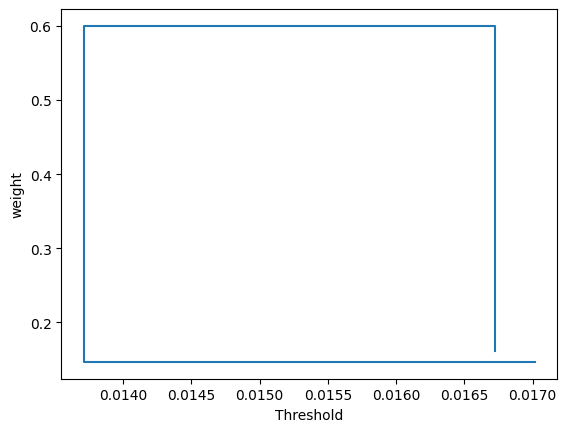

[0.55749503] [0.02702670111436188]


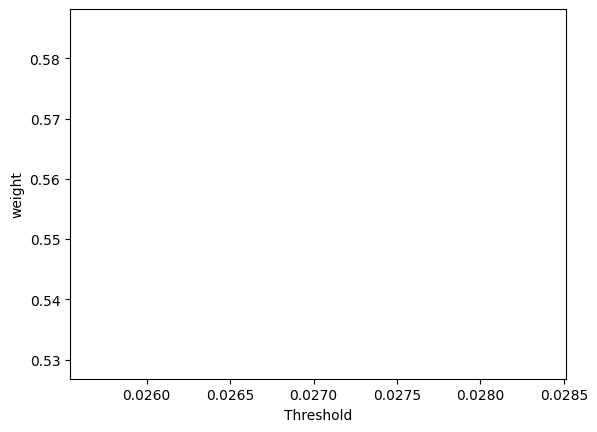

[1.27888207 0.03306871 0.48328464] [0.10976032039475694, 0.15788449025205586, 0.11957205781859805]


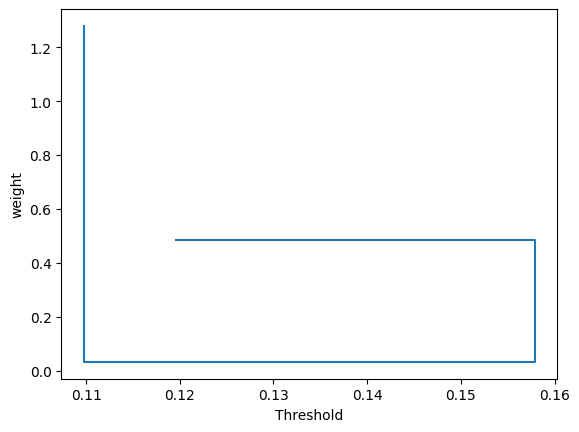

[21.73606139  6.40921805] [0.7689139117556564, 0.79985798788367]


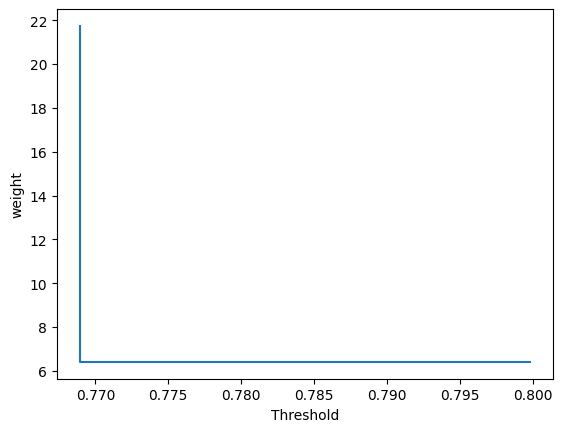

[0.00247301 0.0007312 ] [0.0001416437816229937, 0.0002256884853353064]


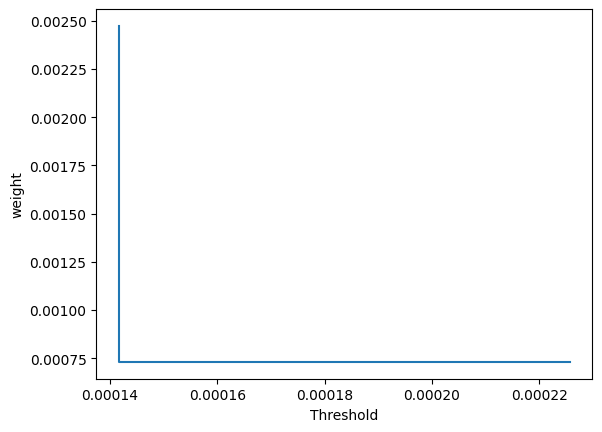

[0.00847244 0.00035253 0.01116246] [0.0002216099885150834, 0.0012197590227779195, 8.918003903151539e-05]


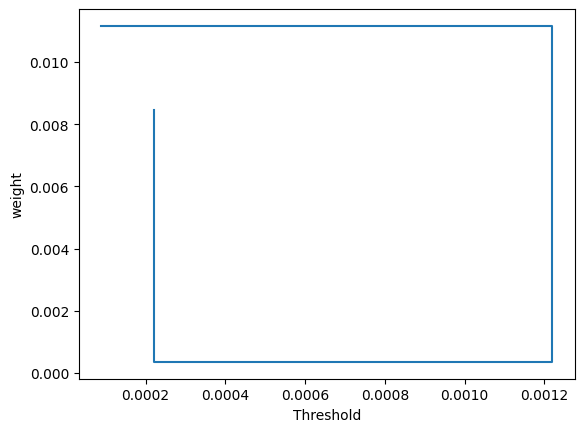

[0.01113312 0.00424752 0.00934446] [0.00021252175334302874, 0.0005355597941478757, 0.00026242140393949257]


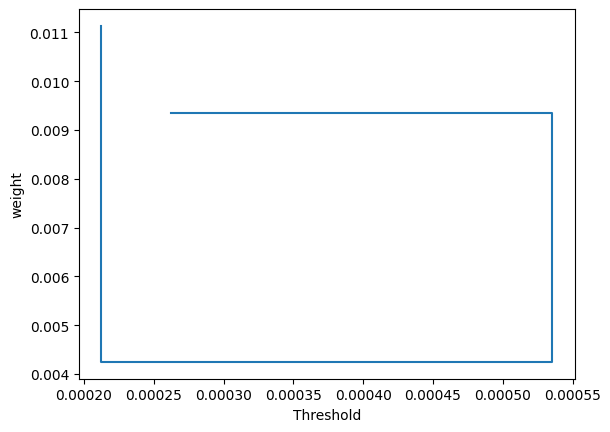

[0.0035081  0.00295351 0.00278231 0.00489216 0.00135475 0.00051004] [0.0001019585470928296, 0.00011688251045028654, 0.00012455202043712044, 5.153505735817322e-05, 0.00016038818623816632, 0.0002205244717444789]


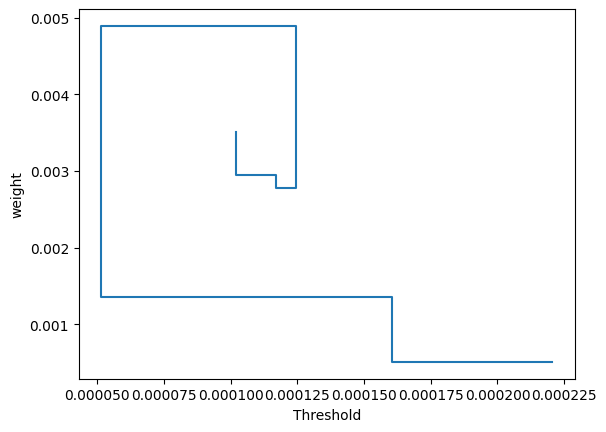

[0.00529036 0.00852257 0.01174836] [0.0003075750854497092, 0.0002608098161637198, 0.00011585235224920202]


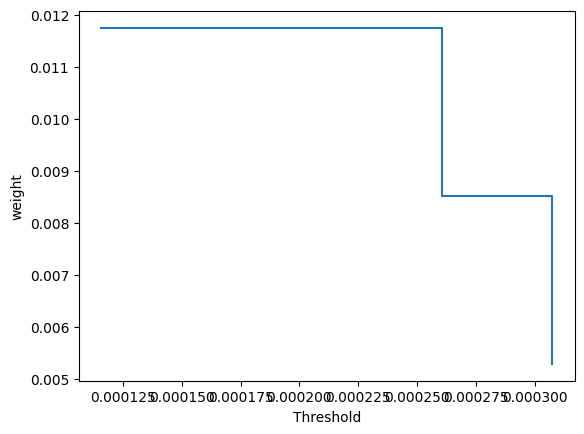

[0.00180201 0.00243065 0.00272264 0.00038484] [8.922689327513233e-05, 7.396236770555651e-05, 6.570444363824015e-05, 0.0001711053173866722]


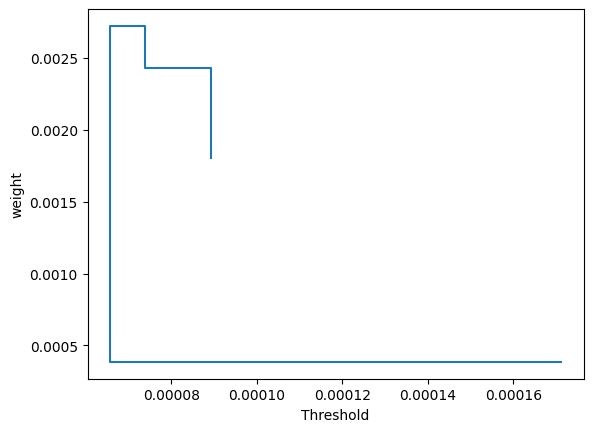

In [236]:
for predictor_variable, thresholds in soglie.items():
    print(omega_star[predictor_variable], soglie[predictor_variable])
    plt.step(soglie[predictor_variable], omega_star[predictor_variable])
    plt.xlabel('Threshold')
    plt.ylabel('weight')
    plt.show()


In [221]:
omega_star[omega_star>0]

array([ 24.94315993,  38.10308345,  65.74714884, 138.96746868,
         4.97145768,   2.01616339,  24.48055322,  68.14824137,
        66.66393681])

In [174]:
lambda_star = np.array([0 if l < 1e-6 else l for l in lambda_star])

In [175]:
lambda_star

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.84673782e-01,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       9.48300774e-01, 6.39040649e-01, 4.52724305e-01, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 9.99999994e-01,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.38160486e-01, 0.00000000e+00, 6.74539217e-01,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       7.38960667e-01, 0.00000000e+00, 9.99999938e-01, 0.00000000e+00,
       7.43657628e-01, 6.79438244e-01, 0.00000000e+00, 0.00000000e+00,
       6.63044201e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 4.18736363e-01, 0.00000000e+00,
      

In [176]:
def compute_out(x):

    p = len(x)

    def score(i):
        score = 0
        for predictor_var in range(p):
            for soglia in soglie[predictor_var]:
                if x[predictor_var] > soglia:
                    score += x[i]

    out = np.sum(np.array(list(map(score, np.arange(len(lambda_star)))))) #+ self.b
    # print(out)
    return out

def parallel_predict(x):
    return np.array(list(map(compute_out, x)))

def predict(x):
    out = parallel_predict(x)
    return np.sign(out)


In [179]:
y_pred = predict(X)

In [180]:
np.unique(y_pred)

array([1.])

In [182]:
accuracy_score(y, y_pred)

0.6274165202108963